In [9]:
# pip install seaborn --upgrade

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, f1_score, accuracy_score, classification_report, confusion_matrix
import time
from xgboost import XGBClassifier

In [2]:
X_nt = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_non_test_set.csv")
X_t = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_test_set.csv")
y_nt = X_nt.pop("RECURRENCE")
y_t = X_t.pop("RECURRENCE")

In [3]:
# BASELINE RUN-------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_nt, y_nt, test_size = 0.3, random_state = 0, stratify = y_nt)

In [5]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_val_std = ss.transform(X_val)

In [6]:
imputer = SimpleImputer(strategy = 'median')
X_train_std_im = imputer.fit_transform(X_train_std)
X_val_std_im = imputer.transform(X_val_std)

In [7]:
model = XGBClassifier(random_state = 42)

In [8]:
model.fit(X_train_std_im, y_train)
y_preds_val = model.predict(X_val_std_im)
accuracy_val = accuracy_score(y_val, y_preds_val)
report = classification_report(y_val, y_preds_val)
print(f"accuracy = {accuracy_val}")
print(report)

accuracy = 0.863013698630137
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       128
           1       0.40      0.22      0.29        18

    accuracy                           0.86       146
   macro avg       0.65      0.59      0.60       146
weighted avg       0.84      0.86      0.85       146



[[122   6]
 [ 14   4]]


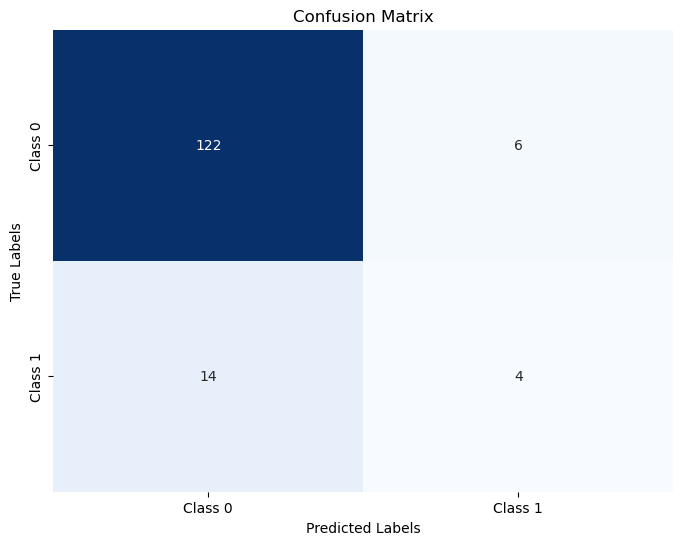

In [9]:
cm = confusion_matrix(y_val, y_preds_val)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [10]:
imputer = SimpleImputer(strategy = 'median')
X_train_im = imputer.fit_transform(X_train)
X_val_im = imputer.transform(X_val)

In [11]:
model = XGBClassifier(random_state = 42)

In [12]:
model.fit(X_train_im, y_train)
y_preds_val = model.predict(X_val_im)
accuracy_val = accuracy_score(y_val, y_preds_val)
report = classification_report(y_val, y_preds_val)
print(f"accuracy = {accuracy_val}")
print(report)

accuracy = 0.863013698630137
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       128
           1       0.40      0.22      0.29        18

    accuracy                           0.86       146
   macro avg       0.65      0.59      0.60       146
weighted avg       0.84      0.86      0.85       146



[[122   6]
 [ 14   4]]


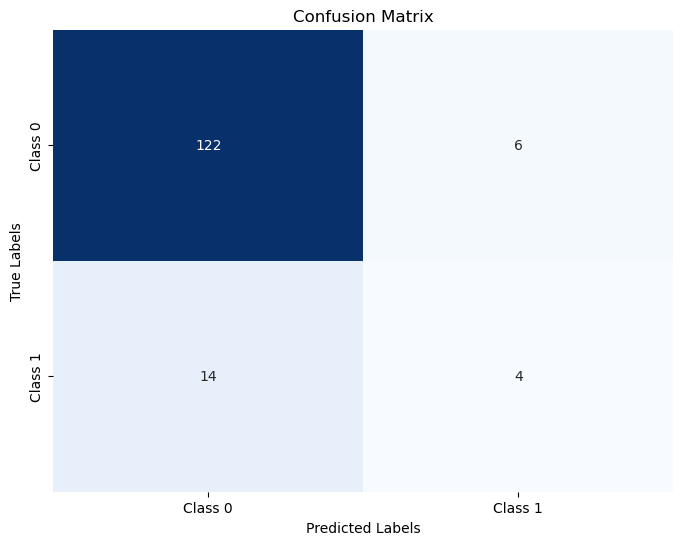

In [13]:
cm = confusion_matrix(y_val, y_preds_val)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
model = XGBClassifier(random_state = 42)
model.fit(X_train_im, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [15]:
y_p = model.predict(X_train_im)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [50]:
# model.get_params()

In [17]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [14]:
# NAIVE GRID SEARCH--------------------------------------------------------------------------------------------------------------------------------------

In [20]:
X_nt.isna().sum().sum()

8

In [24]:
model1 = XGBClassifier(verbosity = 2, random_state = 42)
imputer1 = SimpleImputer()
pipeline1 = Pipeline([
    ('imputer', imputer1),
    ('model', model1)
])

In [27]:
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [50, 100, 200],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 1, 5],
#     'reg_alpha': [0, 0.1, 0.5, 1],
#     'reg_lambda': [0, 1, 1.5, 2],
#     'scale_pos_weight': [1, 2, 5],
#     'max_delta_step': [0, 1, 2], 
# }
# print(3 * 3 * 3 * 3 * 3 * 3 * 3 * 3 * 3 * 3 * 3) # = 177477

In [29]:
param_grid1 = {
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__n_estimators': [50, 100, 150],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.5],
    'model__reg_lambda': [0, 1, 1.5],
    'imputer__strategy': ['constant', 'median'],  # Assuming the imputer is part of your pipeline
}
print(3 * 3 * 3 * 3 * 3 * 3 * 3 * 2 * 5)

21870


In [35]:
def grid_searcher(param_grid, pipeline, scoring = 'f1', cv = 5, verbose = 1):
    tic = time.time()
    grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = cv, scoring = scoring, n_jobs = -1, verbose = verbose)
    grid_search.fit(X_nt, y_nt)
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    best_model = grid_search.best_estimator_
    toc = time.time()
    print("Time Taken:", toc - tic)
    return best_params, best_model

In [36]:
best_params1, best_model1 = grid_searcher(param_grid1, pipeline1)

Fitting 5 folds for each of 4374 candidates, totalling 21870 fits
Best Hyperparameters: {'imputer__strategy': 'median', 'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 0, 'model__reg_lambda': 0, 'model__subsample': 1.0}
Time Taken: 159.1688051223755


In [38]:
def model_test(best_model):
    y_pred_test = best_model.predict(X_t)
    report_test = classification_report(y_t, y_pred_test)
    print("Classification Report on Test Set:")
    print(report_test)
    cm = confusion_matrix(y_t, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       183
           1       0.58      0.27      0.37        26

    accuracy                           0.89       209
   macro avg       0.74      0.62      0.65       209
weighted avg       0.86      0.89      0.87       209



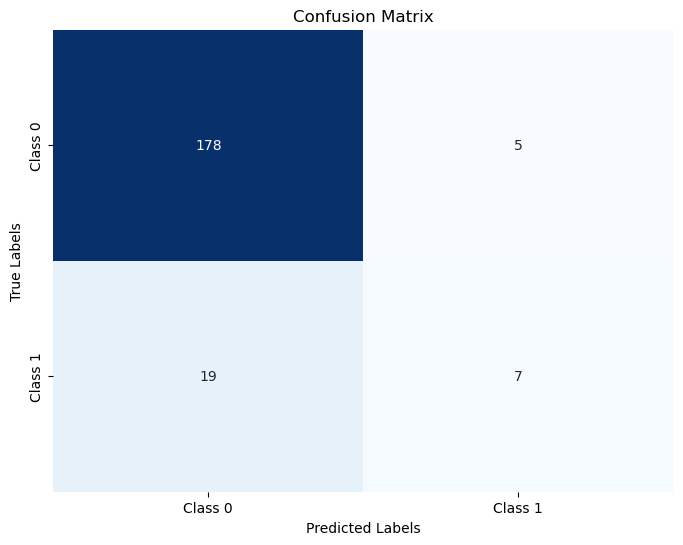

In [39]:
model_test(best_model1)

In [40]:
best_params1

{'imputer__strategy': 'median',
 'model__colsample_bytree': 0.8,
 'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__n_estimators': 100,
 'model__reg_alpha': 0,
 'model__reg_lambda': 0,
 'model__subsample': 1.0}

In [42]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [43]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('model', model)
])

In [44]:
pipeline.fit(X_nt, y_nt)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       183
           1       0.20      0.12      0.15        26

    accuracy                           0.83       209
   macro avg       0.54      0.52      0.53       209
weighted avg       0.80      0.83      0.81       209



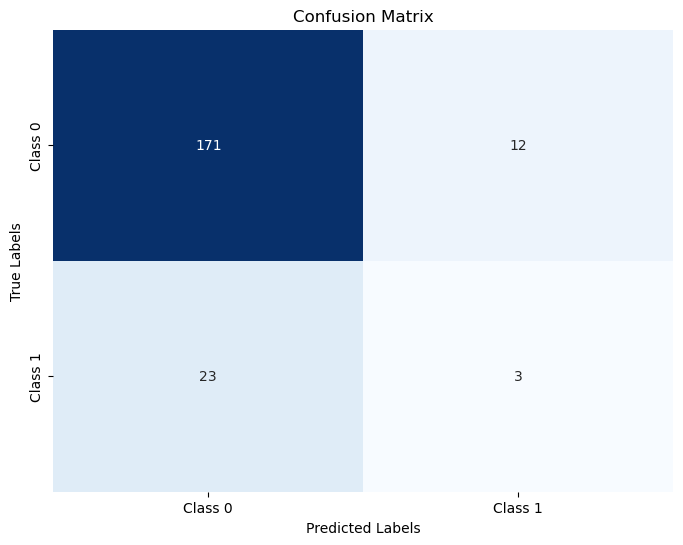

In [45]:
model_test(pipeline)

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       183
           1       0.58      0.27      0.37        26

    accuracy                           0.89       209
   macro avg       0.74      0.62      0.65       209
weighted avg       0.86      0.89      0.87       209



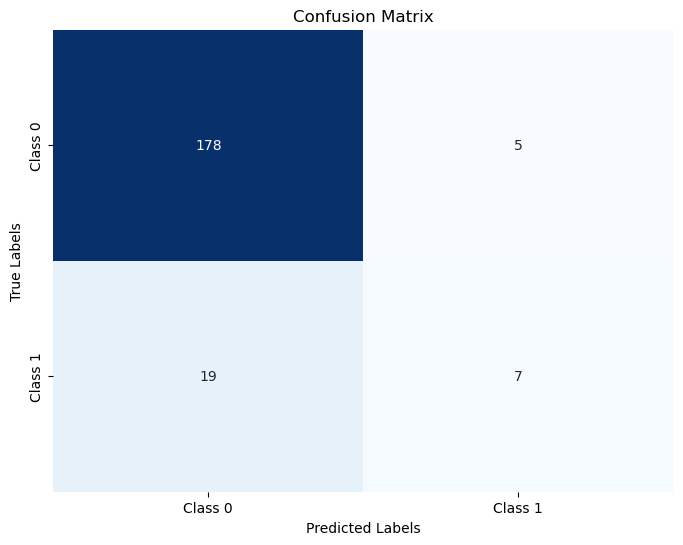

In [46]:
model_test(best_model1)

In [47]:
param_grid1

{'model__max_depth': [3, 5, 7],
 'model__learning_rate': [0.1, 0.01, 0.001],
 'model__n_estimators': [50, 100, 150],
 'model__subsample': [0.8, 0.9, 1.0],
 'model__colsample_bytree': [0.8, 0.9, 1.0],
 'model__reg_alpha': [0, 0.1, 0.5],
 'model__reg_lambda': [0, 1, 1.5],
 'imputer__strategy': ['constant', 'median']}

In [51]:
best_params1
# to cross_validate
# colsample_bytree
# learning_rate
# max_depth narrower range

# n_estimators narrower range
# (reg_alpha?!?! yeah it can be zero)

{'imputer__strategy': 'median',
 'model__colsample_bytree': 0.8,
 'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__n_estimators': 100,
 'model__reg_alpha': 0,
 'model__reg_lambda': 0,
 'model__subsample': 1.0}

In [59]:
param_grid2 = {
    'model__max_depth': [2, 3, 4],
    'model__learning_rate': [0.15, 0.1, 0.5],
    'model__n_estimators': [80, 100, 120],
    'model__colsample_bytree': [0.6, 0.7, 0.8],
    'model__min_child_weight': [1, 3, 5], # cover
    'model__gamma': [0, 1, 5],
    'model__scale_pos_weight': [1, 2, 5],
    'model__max_delta_step': [0, 1, 2]
}
3 * 3 * 3 * 3 * 3 * 3 * 3 * 3 * 5

32805

In [62]:
model2 = XGBClassifier(verbosity = 2, random_state = 42, reg_alpha = 0, reg_lambda = 0, subsample = 1)
imputer2 = SimpleImputer(strategy='median')
pipeline2 = Pipeline([
    ('imputer', imputer2),
    ('model', model2)
])

In [63]:
best_params2, best_model2 = grid_searcher(param_grid2, pipeline2)

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits
Best Hyperparameters: {'model__colsample_bytree': 0.6, 'model__gamma': 1, 'model__learning_rate': 0.5, 'model__max_delta_step': 1, 'model__max_depth': 3, 'model__min_child_weight': 5, 'model__n_estimators': 80, 'model__scale_pos_weight': 5}
Time Taken: 146.45092964172363


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       183
           1       0.32      0.46      0.37        26

    accuracy                           0.81       209
   macro avg       0.62      0.66      0.63       209
weighted avg       0.84      0.81      0.82       209



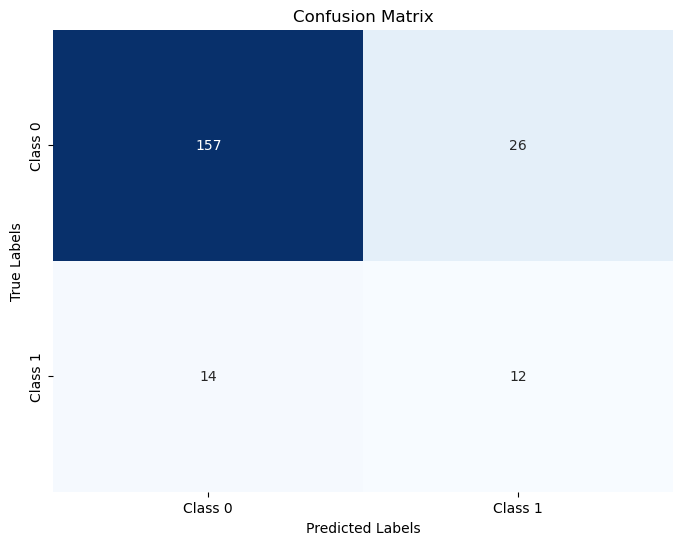

In [64]:
model_test(best_model2)

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       183
           1       0.58      0.27      0.37        26

    accuracy                           0.89       209
   macro avg       0.74      0.62      0.65       209
weighted avg       0.86      0.89      0.87       209



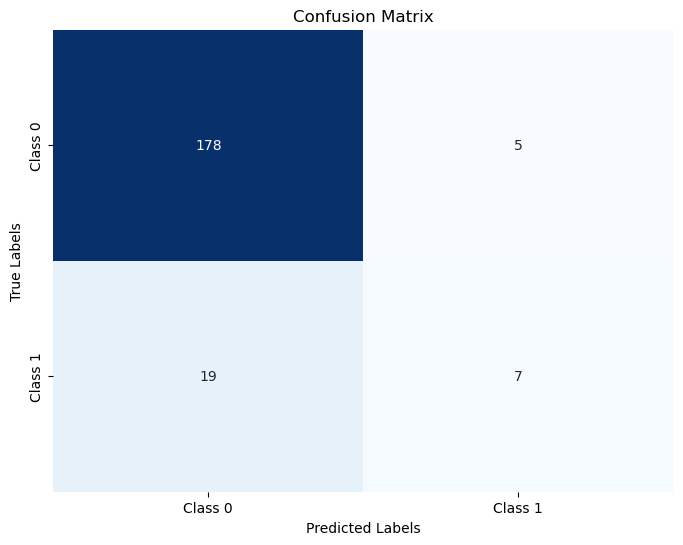

In [65]:
model_test(best_model1)

In [66]:
best_params2

{'model__colsample_bytree': 0.6,
 'model__gamma': 1,
 'model__learning_rate': 0.5,
 'model__max_delta_step': 1,
 'model__max_depth': 3,
 'model__min_child_weight': 5,
 'model__n_estimators': 80,
 'model__scale_pos_weight': 5}

In [75]:
param_grid2
# to be CVd more:
# gamma
# learning_rate, definitely
# n_estimators
# colsample_by_tree
# min_child_weight
# scale_pos_weight

{'model__max_depth': [2, 3, 4],
 'model__learning_rate': [0.15, 0.1, 0.5],
 'model__n_estimators': [80, 100, 120],
 'model__colsample_bytree': [0.6, 0.7, 0.8],
 'model__min_child_weight': [1, 3, 5],
 'model__gamma': [0, 1, 5],
 'model__scale_pos_weight': [1, 2, 5],
 'model__max_delta_step': [0, 1, 2]}

In [73]:
param_grid2a = {
    'model__max_depth': [2, 3, 4],
    'model__learning_rate': [0.15, 0.1, 0.2],
    'model__n_estimators': [80, 100, 120],
    'model__colsample_bytree': [0.6, 0.7, 0.8],
    'model__min_child_weight': [1, 3, 5], # cover
    'model__gamma': [0, 1, 5],
    'model__scale_pos_weight': [1, 2, 5],
    'model__max_delta_step': [0, 1, 2]
}

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits
Best Hyperparameters: {'model__colsample_bytree': 0.7, 'model__gamma': 0, 'model__learning_rate': 0.2, 'model__max_delta_step': 0, 'model__max_depth': 3, 'model__min_child_weight': 3, 'model__n_estimators': 120, 'model__scale_pos_weight': 5}
Time Taken: 200.434180021286
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       183
           1       0.30      0.42      0.35        26

    accuracy                           0.80       209
   macro avg       0.61      0.64      0.62       209
weighted avg       0.84      0.80      0.82       209



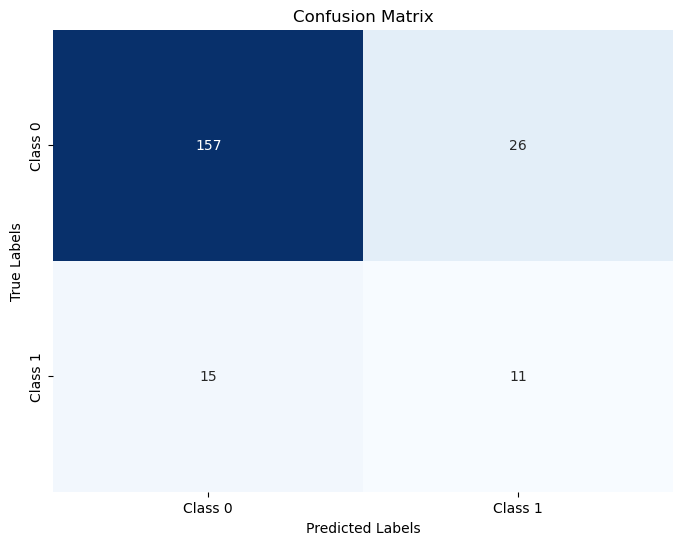

In [74]:
best_params2a, best_model2a = grid_searcher(param_grid2a, pipeline2)
model_test(best_model2a)

In [77]:
best_params2a

{'model__colsample_bytree': 0.7,
 'model__gamma': 0,
 'model__learning_rate': 0.2,
 'model__max_delta_step': 0,
 'model__max_depth': 3,
 'model__min_child_weight': 3,
 'model__n_estimators': 120,
 'model__scale_pos_weight': 5}

In [78]:
best_params2

{'model__colsample_bytree': 0.6,
 'model__gamma': 1,
 'model__learning_rate': 0.5,
 'model__max_delta_step': 1,
 'model__max_depth': 3,
 'model__min_child_weight': 5,
 'model__n_estimators': 80,
 'model__scale_pos_weight': 5}

In [79]:
model3 = XGBClassifier(random_state = 42)
imputer3 = SimpleImputer(strategy = 'median')
pipeline3 = Pipeline([
    ('imputer', imputer3),
    ('model', model3)
])

In [81]:
np.linspace(0.01, 1, 100)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [89]:
param_grid1

{'model__max_depth': [3, 5, 7],
 'model__learning_rate': [0.1, 0.01, 0.001],
 'model__n_estimators': [50, 100, 150],
 'model__subsample': [0.8, 0.9, 1.0],
 'model__colsample_bytree': [0.8, 0.9, 1.0],
 'model__reg_alpha': [0, 0.1, 0.5],
 'model__reg_lambda': [0, 1, 1.5],
 'imputer__strategy': ['constant', 'median']}

In [93]:
param_grid3a = {
    'model__learning_rate': np.linspace(0.01, 1, 100),
    # 'model__n_estimators':[50, 75, 100, 125, 150],
    # 'model__max_depth': [3, 5, 7]
}

In [96]:
best_params3a, best_model3a = grid_searcher(param_grid3a, pipeline3)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'model__learning_rate': 0.060000000000000005}
Time Taken: 7.5412938594818115


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       183
           1       0.19      0.12      0.14        26

    accuracy                           0.83       209
   macro avg       0.53      0.52      0.52       209
weighted avg       0.79      0.83      0.81       209



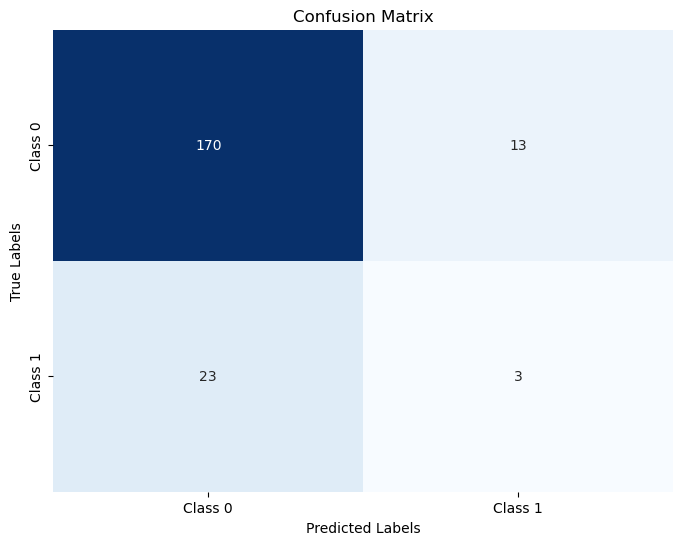

In [100]:
model_test(model)

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       183
           1       0.44      0.15      0.23        26

    accuracy                           0.87       209
   macro avg       0.67      0.56      0.58       209
weighted avg       0.83      0.87      0.84       209



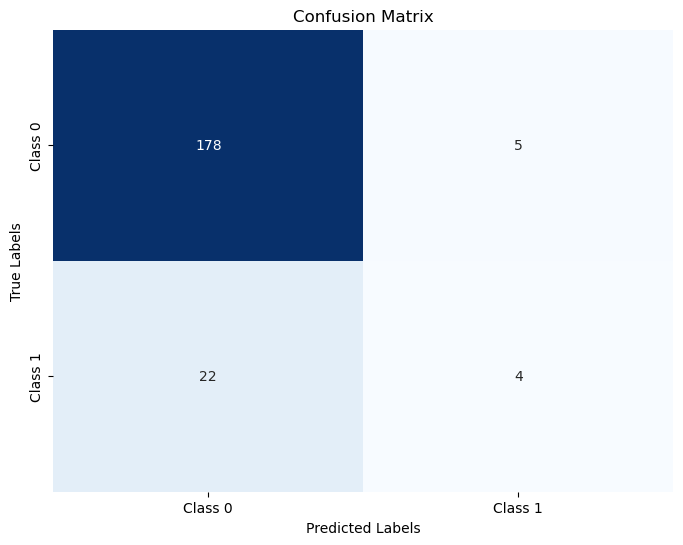

In [97]:
model_test(best_model3a)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Hyperparameters: {'model__learning_rate': 0.060000000000000005, 'model__n_estimators': 100}
Time Taken: 13.669091701507568
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       183
           1       0.44      0.15      0.23        26

    accuracy                           0.87       209
   macro avg       0.67      0.56      0.58       209
weighted avg       0.83      0.87      0.84       209



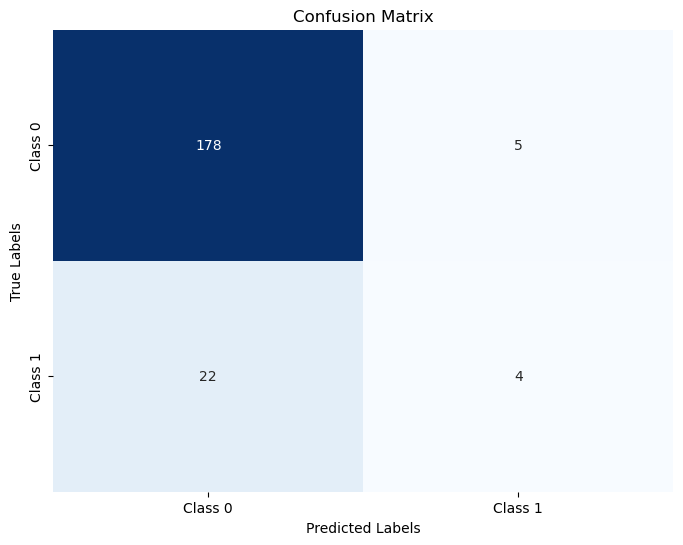

In [102]:
param_grid3b = {
    'model__learning_rate': np.linspace(0.01, 1, 100),
    'model__n_estimators':[50, 75, 100, 125, 150],
    # 'model__max_depth': [3, 5, 7]
}
best_params3b, best_model3b = grid_searcher(param_grid3b, pipeline3)
model_test(best_model3b)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
Best Hyperparameters: {'model__learning_rate': 0.23, 'model__max_depth': 3, 'model__n_estimators': 50}
Time Taken: 42.86776638031006
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       183
           1       0.50      0.15      0.24        26

    accuracy                           0.88       209
   macro avg       0.70      0.57      0.58       209
weighted avg       0.84      0.88      0.85       209



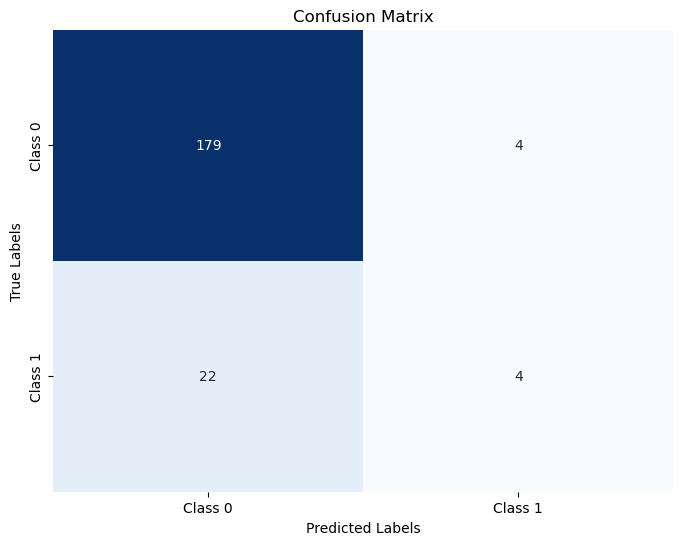

In [104]:
param_grid3c = {
    'model__learning_rate': np.linspace(0.01, 1, 100),
    'model__n_estimators':[50, 75, 100, 125, 150],
    'model__max_depth': [3, 5, 7]
}
best_params3c, best_model3c = grid_searcher(param_grid3c, pipeline3)
model_test(best_model3c)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
Best Hyperparameters: {'model__learning_rate': 0.23, 'model__max_depth': 3, 'model__n_estimators': 50}
Time Taken: 37.0036187171936
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       183
           1       0.50      0.15      0.24        26

    accuracy                           0.88       209
   macro avg       0.70      0.57      0.58       209
weighted avg       0.84      0.88      0.85       209



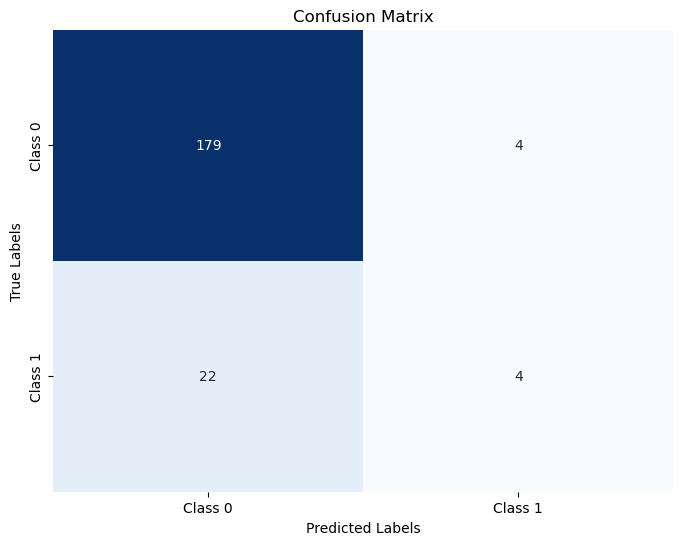

In [106]:
param_grid3ci = {
    'model__learning_rate': np.linspace(0.01, 1, 100),
    'model__n_estimators':[50, 75, 100, 125, 150],
    'model__max_depth': [2, 3, 4]
}
best_params3ci, best_model3ci = grid_searcher(param_grid3ci, pipeline3)
model_test(best_model3ci)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
Best Hyperparameters: {'model__learning_rate': 1.0, 'model__max_depth': 2, 'model__n_estimators': 30}
Time Taken: 25.974801778793335
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       183
           1       0.36      0.19      0.25        26

    accuracy                           0.86       209
   macro avg       0.62      0.57      0.59       209
weighted avg       0.83      0.86      0.84       209



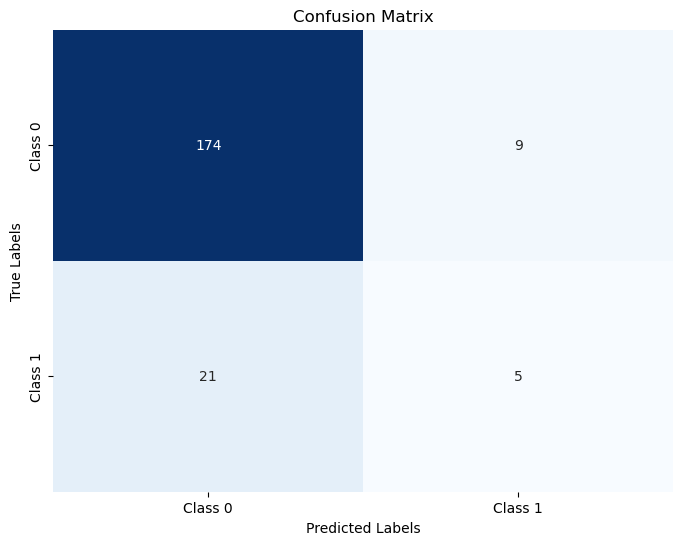

In [108]:
param_grid3cii = {
    'model__learning_rate': np.linspace(0.01, 1, 100),
    'model__n_estimators':[30, 40, 50, 60, 70],
    'model__max_depth': [2, 3, 4]
}
best_params3cii, best_model3cii = grid_searcher(param_grid3cii, pipeline3)
model_test(best_model3cii)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits
Best Hyperparameters: {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 150, 'model__reg_lambda': 0.5}
Time Taken: 311.7853796482086
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       183
           1       0.50      0.19      0.28        26

    accuracy                           0.88       209
   macro avg       0.70      0.58      0.60       209
weighted avg       0.85      0.88      0.85       209



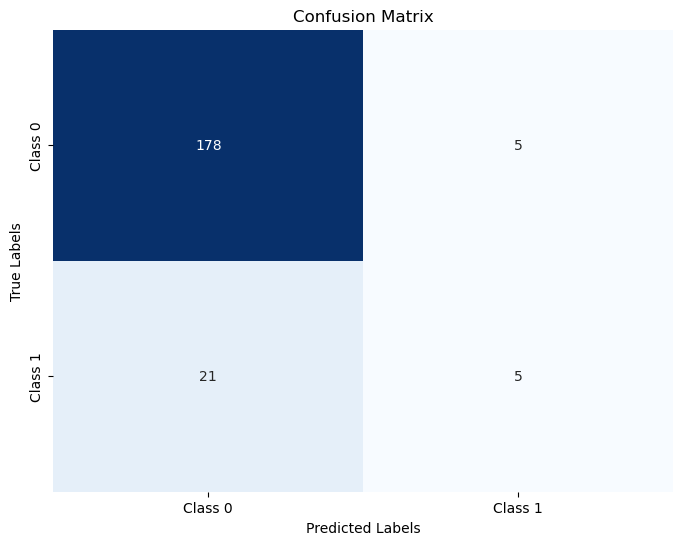

In [114]:
param_grid4 = {
    'model__max_depth': [3, 4, 5, 6, 7],
    'model__learning_rate': np.linspace(0.01, 1, 100),
    'model__n_estimators': [50, 75, 100, 125, 150],
    # 'model__subsample': [0.8, 0.9, 1.0],
    # 'model__colsample_bytree': [0.8, 0.9, 1.0],
    # 'model__reg_alpha': [0, 0.1, 0.25, 0.5],
    'model__reg_lambda': [0, 0.5, 1, 1.5],
    # 'imputer__strategy': ['constant', 'median'],  # Assuming the imputer is part of your pipeline
}
best_params4, best_model4 = grid_searcher(param_grid4, pipeline3)
model_test(best_model4)

In [121]:
np.linspace(0.01, 0.20, 39)

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095,
       0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135, 0.14 ,
       0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 , 0.185,
       0.19 , 0.195, 0.2  ])

Fitting 5 folds for each of 3900 candidates, totalling 19500 fits
Best Hyperparameters: {'model__learning_rate': 0.035, 'model__max_depth': 4, 'model__n_estimators': 200, 'model__reg_lambda': 0}
Time Taken: 172.14588594436646
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       183
           1       0.60      0.23      0.33        26

    accuracy                           0.89       209
   macro avg       0.75      0.60      0.64       209
weighted avg       0.86      0.89      0.86       209



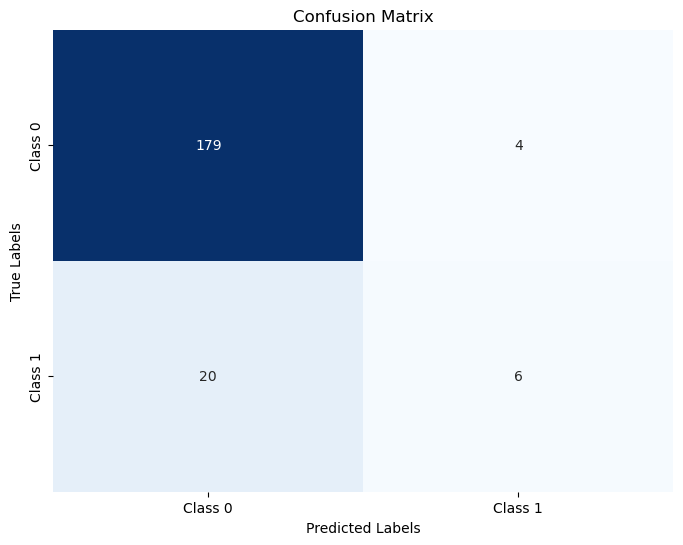

In [124]:
param_grid4i = {
    'model__max_depth': [3, 4, 5, 6, 7],
    'model__learning_rate': np.linspace(0.01, 0.20, 39),
    'model__n_estimators': [100, 125, 150, 175, 200],
    # 'model__subsample': [0.8, 0.9, 1.0],
    # 'model__colsample_bytree': [0.8, 0.9, 1.0],
    # 'model__reg_alpha': [0, 0.1, 0.25, 0.5],
    'model__reg_lambda': [0, 0.5, 1, 1.5],
    # 'imputer__strategy': ['constant', 'median'],  # Assuming the imputer is part of your pipeline
}
best_params4i, best_model4i = grid_searcher(param_grid4i, pipeline3)
model_test(best_model4i)

Fitting 5 folds for each of 84240 candidates, totalling 421200 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.095, 'model__max_depth': 4, 'model__n_estimators': 75, 'model__reg_alpha': 0, 'model__reg_lambda': 0, 'model__subsample': 1.0}
Time Taken: 2381.983747959137
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       183
           1       0.55      0.23      0.32        26

    accuracy                           0.88       209
   macro avg       0.72      0.60      0.63       209
weighted avg       0.86      0.88      0.86       209



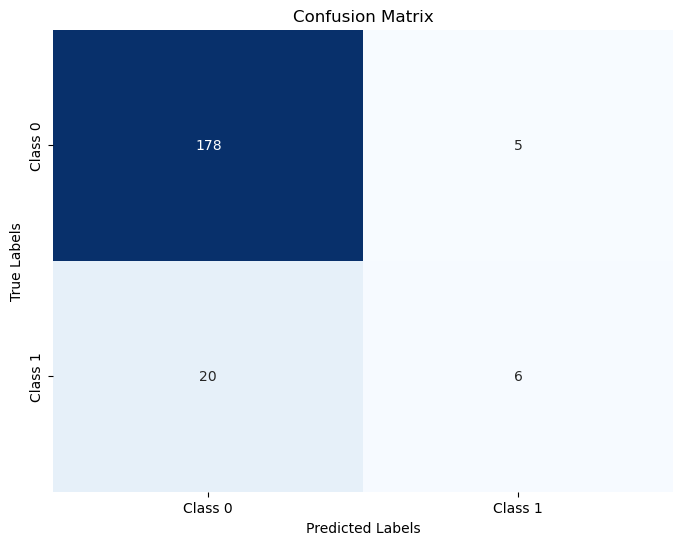

In [128]:
param_grid4ii = {
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': np.linspace(0.01, 0.2, 39),
    'model__n_estimators': [50, 75, 100, 125, 150],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.25, 0.5],
    'model__reg_lambda': [0, 0.5, 1, 1.5],
    
    # 'imputer__strategy': ['constant', 'median'],  # Assuming the imputer is part of your pipeline
}
best_params4ii, best_model4ii = grid_searcher(param_grid4ii, pipeline3)
model_test(best_model4ii)

In [132]:
34117200/421200 * 2400/3600

54.0

In [127]:
param_grid5 = {
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': np.linspace(0.01, 0.2, 39),
    'model__n_estimators': [50, 75, 100, 125, 150],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.25, 0.5],
    'model__reg_lambda': [0, 0.5, 1, 1.5],
    'model__min_child_weight': [1, 3, 5], # cover
    'model__gamma': [0, 1, 5],
    'model__scale_pos_weight': [1, 2, 5],
    'model__max_delta_step': [0, 1, 2]
    # 'imputer__strategy': ['constant', 'median'],  # Assuming the imputer is part of your pipeline
}
best_params5, best_model5 = grid_searcher(param_grid5, pipeline3)
model_test(best_model5)
# 'model__max_depth': [2, 3, 4],
#     'model__learning_rate': [0.15, 0.1, 0.5],
#     'model__n_estimators': [80, 100, 120],
#     'model__colsample_bytree': [0.6, 0.7, 0.8],
#     'model__min_child_weight': [1, 3, 5], # cover
#     'model__gamma': [0, 1, 5],
#     'model__scale_pos_weight': [1, 2, 5],
#     'model__max_delta_step': [0, 1, 2]

Fitting 5 folds for each of 6823440 candidates, totalling 34117200 fits


KeyboardInterrupt: 